In [1]:
from fbm import FBM
from fbm import fbm, fgn, times
import numpy as np
import pandas as pd
import processi_EMGIT as em
import stochastic as st
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf,adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

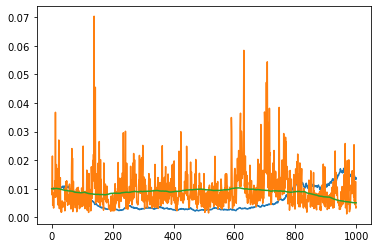

In [2]:
h1=fbm(n=1000, hurst=0.5, length=1, method='daviesharte')
h2=fbm(n=1000, hurst=0.05, length=1, method='daviesharte')
h3=fbm(n=1000, hurst=0.85, length=1, method='daviesharte')
plt.plot(np.exp(h1)/100)
plt.plot(np.exp(h2)/100)
plt.plot(np.exp(h3)/100)
plt.show()

In [3]:
def rough(N,h,seed=457778):
    np.random.seed(seed)
    y=np.empty(N)
    s=np.empty(N)
    s[0]=100
    sigma=np.empty(N)
    sigma[0]=0.01
    dt=1/N
    cov=np.matrix([[1, -0.79],[-0.79, 1]])
    a  =np.linalg.cholesky(cov)
    h1=fbm(n=N, hurst=h, length=1, method='daviesharte')
    h2=fbm(n=N, hurst=0.5, length=1, method='daviesharte')
    for i in range(1,N):
        #y[i]    = y[i-1] -1*y[i-1]*dt+ 1*np.sqrt(dt)*h1[i-1]
        sigma[i]= np.exp(h1[i])/100#'''*a[1, 0]+h1[i] * a[1, 1 ]''')/100
        s[i]    = s[i-1]+s[i-1]*sigma[i]*np.sqrt(dt)*(np.random.randn())
    return [s,sigma]


In [46]:
def rough_vol(N,h,seed=457778):
    np.random.seed(seed)
    y=np.empty(N)
    s=np.empty(N)
    s[0]=100
    sigma=np.empty(N)
    sigma[0]=0.01
    dt=1/N
    cov=np.matrix([[1, -0.79],[-0.79, 1]])
    a  =np.linalg.cholesky(cov)
    h1=fbm(n=N, hurst=h, length=1, method='daviesharte')
    for i in range(1,N):
        #y[i]    = y[i-1] -1*y[i-1]*dt+ 1*np.sqrt(dt)*h1[i-1]
        sigma[i]= np.exp(h1[i])/100#'''*a[1, 0]+h1[i] * a[1, 1 ]''')/100
        s[i]    = s[i-1]+s[i-1]*sigma[i]*np.sqrt(dt)*(np.random.randn()*a[0,0])
    return sigma


def rough_s(N,h,seed=457778):
    np.random.seed(seed)
    y=np.empty(N)
    s=np.empty(N)
    s[0]=100
    sigma=np.empty(N)
    sigma[0]=0.01
    dt=1/N
    cov=np.matrix([[1, -0.79],[-0.79, 1]])
    a  =np.linalg.cholesky(cov)
    h1=fbm(n=N, hurst=h, length=1, method='daviesharte')
    for i in range(1,N):
        #y[i]    = y[i-1] -1*y[i-1]*dt+ 1*np.sqrt(dt)*h1[i-1]
        sigma[i]= np.exp(h1[i])/100#'''*a[1, 0]+h1[i] * a[1, 1 ]''')/100
        s[i]    = s[i-1]+s[i-1]*sigma[i]*np.sqrt(dt)*(np.random.randn()*a[0,0])
    return s    

In [4]:
s=rough(23400,0.05)
r2=em.calcolaRendimenti(s[0],len(s[0]))
f=em.realVol(r2,10,23400)


<Figure size 1440x720 with 0 Axes>

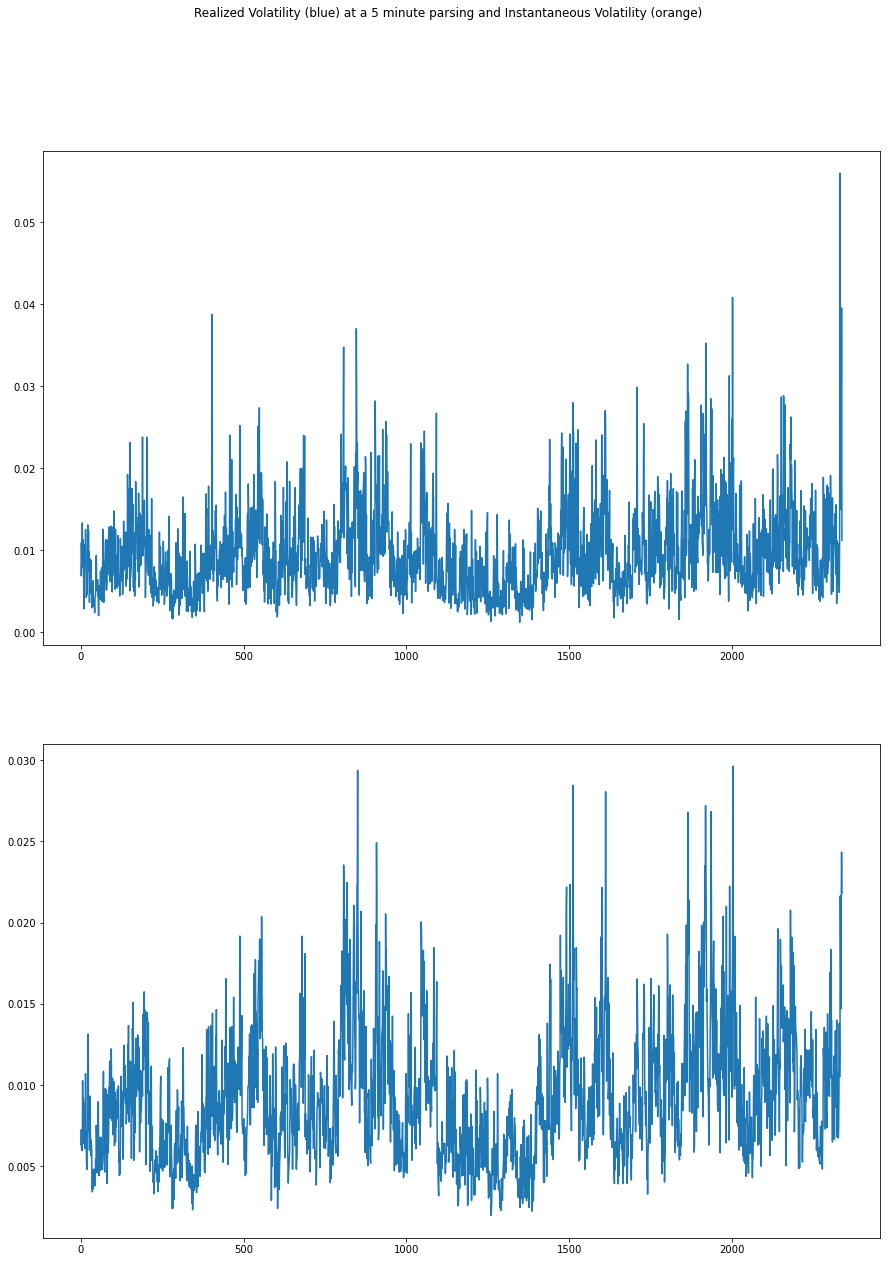

In [48]:

xx=[x for x in range(len(f))]
z1=s[1].reshape(-1,10).mean(axis=1)
z2=s[0].reshape(-1,10).mean(axis=1)

plt.figure(figsize=(20, 10))
fig, axs = plt.subplots(2,1,figsize=(15,20))
fig.suptitle('Realized Volatility (blue) at a 5 minute parsing and Instantaneous Volatility (orange)')
#fig.inftitle("Differences: RV-sigma")

axs[0].plot(xx, f)
axs[1].plot(xx, z1[:-1])
#axs[1,0].plot
plt.show()

In [4]:
Hurst=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
x1=rough(23400,0.05)
x2=rough(23400,0.1)
x3=rough(23400,0.2)
x4=rough(23400,0.3)
x5=rough(23400,0.4)
x6=rough(23400,0.5001)
x7=rough(23400,0.6)
x8=rough(23400,0.7)
x9=rough(23400,0.8)

In [6]:
#0.05
r1=em.calcolaRendimenti(x1[0],len(x1[0]))
f1=em.realVol(r1,10,23400)
#0.1
r2=em.calcolaRendimenti(x2[0],len(x2[0]))
f2=em.realVol(r2,10,23400)
#0.2
r3=em.calcolaRendimenti(x3[0],len(x3[0]))
f3=em.realVol(r3,10,23400)
#0.3
r4=em.calcolaRendimenti(x4[0],len(x4[0]))
f4=em.realVol(r4,10,23400)
#0.4
r5=em.calcolaRendimenti(x5[0],len(x5[0]))
f5=em.realVol(r5,10,23400)
#0.5
r6=em.calcolaRendimenti(x6[0],len(x6[0]))
f6=em.realVol(r6,10,23400)
#0.6
r7=em.calcolaRendimenti(x7[0],len(x7[0]))
f7=em.realVol(r7,10,23400)
#0.7
r8=em.calcolaRendimenti(x8[0],len(x8[0]))
f8=em.realVol(r8,10,23400)
#0.8
r9=em.calcolaRendimenti(x9[0],len(x9[0]))
f9=em.realVol(r9,10,23400)


In [229]:
K=300 #w/noise
#0.05
r1=em.calcolaRendimenti(x1[0],len(x1[0]))
f1=em.realVol(r1,K,23400)
#0.1
r2=em.calcolaRendimenti(x2[0],len(x2[0]))
f2=em.realVol(r2,K,23400)
#0.2
r3=em.calcolaRendimenti(x3[0],len(x3[0]))
f3=em.realVol(r3,K,23400)
#0.3
r4=em.calcolaRendimenti(x4[0],len(x4[0]))
f4=em.realVol(r4,K,23400)
#0.4
r5=em.calcolaRendimenti(x5[0],len(x5[0]))
f5=em.realVol(r5,K,23400)
#0.5
r6=em.calcolaRendimenti(x6[0],len(x6[0]))
f6=em.realVol(r6,K,23400)
#0.6
r7=em.calcolaRendimenti(x7[0],len(x7[0]))
f7=em.realVol(r7,K,23400)
#0.7
r8=em.calcolaRendimenti(x8[0],len(x8[0]))
f8=em.realVol(r8,K,23400)
#0.8
r9=em.calcolaRendimenti(x9[0],len(x9[0]))
f9=em.realVol(r9,K,23400)

In [256]:
#s=em.gbm_expOU(100,1,23400) #K=10==4 minuti
L=8 #5 ,inuti
P=np.linspace(1,10)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(f9,L,P[p])-1)**2#x6[1]
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]

,W()_sigOU
10.0,0.016831


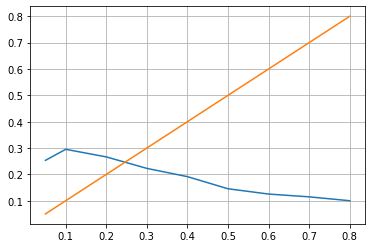

In [261]:
#p=[6.090909,6.363636,6.181818,5,4.545455,4.545455,4.363636,4.363636,4.363636]
p=[3.95,3.387755,3.755102,4.489796,5.22449,6.877551,7.979592,8.714286,10] #3.387755
x=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
h=[]
for i in p:
    h.append(1/i)
plt.plot(x,h,x,x)
plt.grid(True)
plt.show()

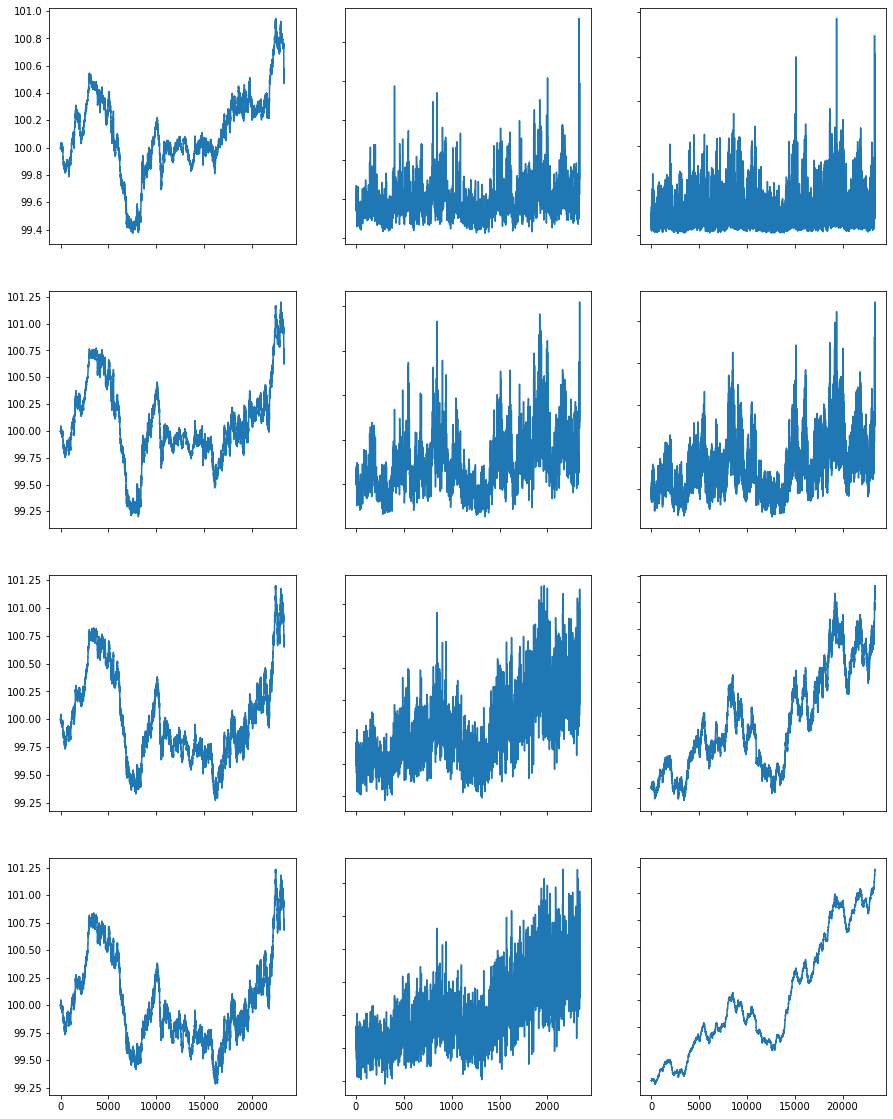

In [58]:
axs=()
fig, ((ax1, ax2, ax3), (ax4, ax5,ax6), (ax7,ax8,ax9), (ax10,ax11,ax12) ) = plt.subplots(nrows=4, ncols=3, figsize=(15,20))

#x1=rough(23400,0.05)
ax1.plot(x1[0])
ax2.plot(f1)
ax3.plot(x1[1])
#x3=rough(23400,0.2)
ax4.plot(x3[0])
ax5.plot(f3)
ax6.plot(x3[1])
#x6=rough(23400,0.5)
ax7.plot(x6[0])
ax8.plot(f6)
ax9.plot(x6[1])
#x8=rough(23400,0.7)
ax10.plot(x8[0])
ax11.plot(f8)
ax12.plot(x8[1])

for ax in fig.get_axes():
    ax.label_outer()


    
plt.show()

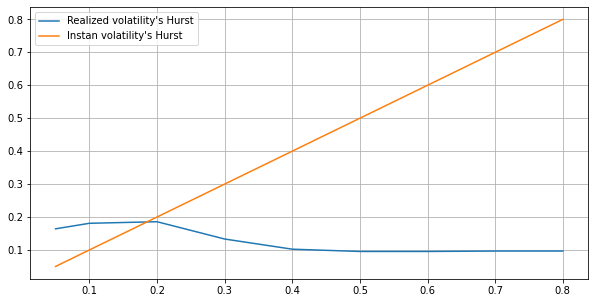

In [63]:
ws=[6.0909,5.52523,5.383838,7.5050,9.76767,10.4747,10.4747,10.333333,10.333333]

hs=[]
for i in range(len(ws)):
    hs.append(1/ws[i])
plt.figure(figsize=(10,5))
plt.plot(Hurst,hs,label='Realized volatility\'s Hurst')
plt.plot(Hurst,Hurst,label='Instan volatility\'s Hurst')

plt.grid(True)
plt.legend()
plt.show()

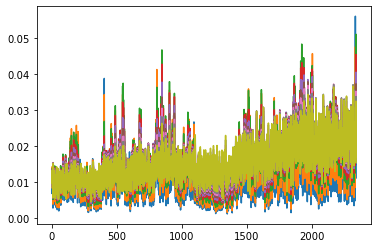

In [60]:
#RV
plt.plot(f1)
plt.plot(f2)
plt.plot(f3)
plt.plot(f4)
plt.plot(f5)
plt.plot(f6)
plt.plot(f7)
plt.plot(f8)
plt.plot(f9)
plt.show()

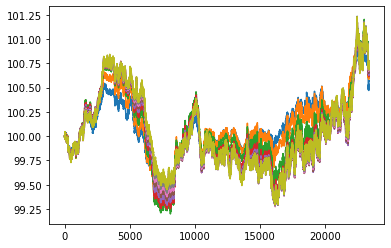

In [61]:
#S_t
plt.plot(x1[0])
plt.plot(x2[0])
plt.plot(x3[0])
plt.plot(x4[0])
plt.plot(x5[0])
plt.plot(x6[0])
plt.plot(x7[0])
plt.plot(x8[0])
plt.plot(x9[0])
plt.show()

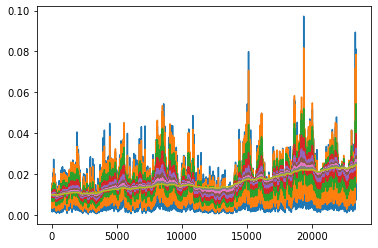

In [62]:
#sigma_t
plt.plot(x1[1])
plt.plot(x2[1])
plt.plot(x3[1])
plt.plot(x4[1])
plt.plot(x5[1])
plt.plot(x6[1])
plt.plot(x7[1])
plt.plot(x8[1])
plt.plot(x9[1])
plt.show()